In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [37]:
train_dir = r"C:\Users\hegde\Downloads\archive\casting_512x512\casting_512x512"  

In [5]:
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [7]:
train_data = data_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64), 
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1041 images belonging to 2 classes.
Found 259 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

C:\Users\hegde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,  
    verbose=1
)

Epoch 1/15


C:\Users\hegde\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.5608 - loss: 0.7371 - val_accuracy: 0.6023 - val_loss: 0.6760
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.6056 - loss: 0.6612 - val_accuracy: 0.5985 - val_loss: 0.6588
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6203 - loss: 0.6429 - val_accuracy: 0.6255 - val_loss: 0.6309
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.7009 - loss: 0.5980 - val_accuracy: 0.6950 - val_loss: 0.5830
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.7178 - loss: 0.5727 - val_accuracy: 0.6873 - val_loss: 0.5666
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.7001 - loss: 0.6050 - val_accuracy: 0.7143 - val_loss: 0.5651
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.7328 - loss: 0.5439 - val_accuracy: 0.7066 - val_loss: 0.5672
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.7317 - loss: 0.5809 - val_accuracy: 0.7297 - val_

In [15]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.7490 - loss: 0.5027
Validation Accuracy: 0.75


In [17]:
val_data.reset()
y_pred = (model.predict(val_data) > 0.5).astype("int32").flatten()
y_true = val_data.classes

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


In [19]:
print("CNN Classification Report:\n", classification_report(y_true, y_pred, target_names=['non-defective', 'defective']))

CNN Classification Report:
                precision    recall  f1-score   support

non-defective       0.59      0.63      0.61       156
    defective       0.37      0.33      0.35       103

     accuracy                           0.51       259
    macro avg       0.48      0.48      0.48       259
 weighted avg       0.50      0.51      0.51       259



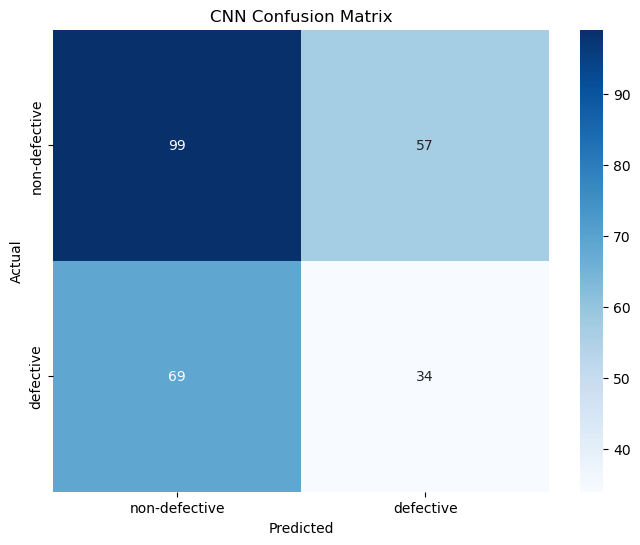

In [21]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['non-defective', 'defective'], yticklabels=['non-defective', 'defective'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('CNN Confusion Matrix')
plt.show()

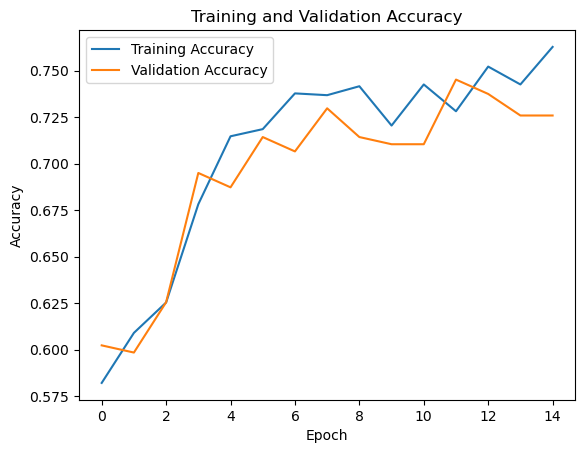

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

CNN Classification for Image Classification

Convolutional Neural Networks (CNNs) are particularly suited for image classification tasks. Unlike other models, CNNs automatically extract relevant features from the images, which eliminates the need for manual feature extraction. This ability makes CNNs highly efficient in handling image data.

When working with CNNs, several factors impact the outcomes such as accuracy, precision, and recall. For example, the choice of batch size and target image size plays a crucial role in model performance. Additionally, the structure of the network, including the types of layers (such as flatten layers, dense layers), activation functions, and the number of epochs, can significantly affect the results.

For binary classification tasks, simpler models, such as a perceptron, are often sufficient. In the case of CNNs, it's important to design a model that is as simple as possible while still capturing the necessary patterns.

In this case, I used a target image size of 64x64 and a batch size of 32. Even though modifying these hyperparameters slightly improved the results, statistical analysis through hypothesis testing indicated that the changes were not statistically significant, suggesting that the null hypothesis (no change in results) holds true.

Moreover, I tested the model on other datasets with higher image quality (with the same batch size and target size), and the results were comparable. Interestingly, even without employing data augmentation, the performance remained consistent across different experiments.

In conclusion, while CNNs are powerful for image classification, fine-tuning hyperparameters like batch size, target size, and layer configurations plays a significant role in achieving optimal performance. However, small changes in these parameters may not always lead to significant improvements, as observed in this case.